In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/Colab Notebooks"

In [3]:
!pip install split-folders

In [4]:
import splitfolders

splitfolders.fixed("/content/drive/MyDrive/Colab Notebooks", output=path+"/output",
    seed=1337, fixed=(260, 260), oversample=False, group_prefix=None, move=False)

Copying files: 4600 files [01:53, 40.39 files/s] 


In [5]:
import os

for dir, dirname, files in os.walk(path+'/output'):
    print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: /content/drive/MyDrive/Colab Notebooks/output | subdir: ['train', 'val', 'test'] | cant de imagenes: 0 
Dir: /content/drive/MyDrive/Colab Notebooks/output/train | subdir: ['Brain Tumor', 'Healthy'] | cant de imagenes: 0 
Dir: /content/drive/MyDrive/Colab Notebooks/output/train/Brain Tumor | subdir: [] | cant de imagenes: 1993 
Dir: /content/drive/MyDrive/Colab Notebooks/output/train/Healthy | subdir: [] | cant de imagenes: 1567 
Dir: /content/drive/MyDrive/Colab Notebooks/output/val | subdir: ['Brain Tumor', 'Healthy'] | cant de imagenes: 0 
Dir: /content/drive/MyDrive/Colab Notebooks/output/val/Brain Tumor | subdir: [] | cant de imagenes: 260 
Dir: /content/drive/MyDrive/Colab Notebooks/output/val/Healthy | subdir: [] | cant de imagenes: 260 
Dir: /content/drive/MyDrive/Colab Notebooks/output/test | subdir: ['Brain Tumor', 'Healthy'] | cant de imagenes: 0 
Dir: /content/drive/MyDrive/Colab Notebooks/output/test/Brain Tumor | subdir: [] | cant de imagenes: 260 
Dir: /content/drive

In [6]:
classes = [f for f in os.listdir(path+'/output/train')]
print(classes)

['Brain Tumor', 'Healthy']


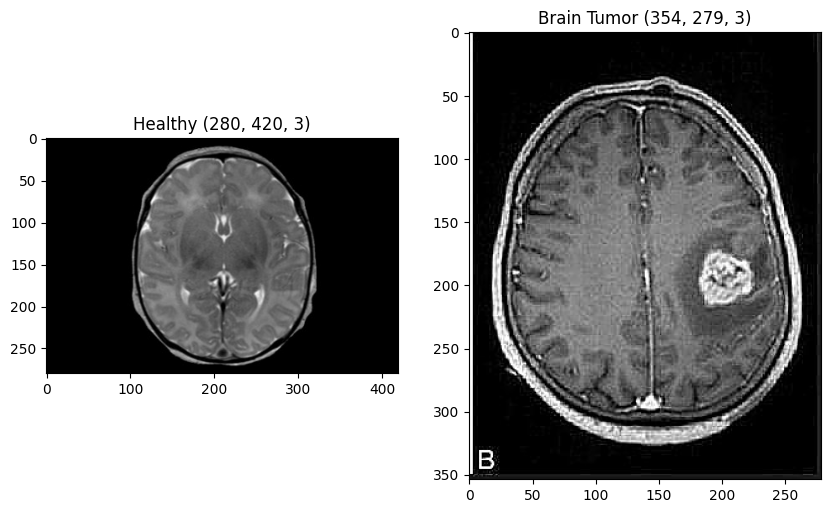

In [7]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10,7))
id = random.choice(range(0,1499))
plt.subplot(1,2,1)
img_name = [f for f in os.listdir(path+'/output/train/Healthy/')][id]
img = plt.imread(path+'/output/train/Healthy/'+img_name)
plt.imshow(img)
plt.title('Healthy '+str(img.shape))
plt.subplot(1,2,2)
img_name = [f for f in os.listdir(path+'/output/train/Brain Tumor/')][id]
img = plt.imread(path+'/output/train/Brain Tumor/'+img_name)
plt.imshow(img)
plt.title('Brain Tumor '+str(img.shape));

In [8]:
lista_img_tumor = [f for f in os.listdir(path+'/output/train/Brain Tumor/')]
imagen_prime = plt.imread(path+'/output/train/Brain Tumor/'+lista_img_tumor[23])
print(f"Shape of the image: {imagen_prime.shape}")
print(f"Dimensiones of the image: {imagen_prime.ndim}")
print(f"Codify the image: {imagen_prime.dtype}")
print(f"Pixel of major value: {imagen_prime.max()}")
print(f"Pixel of minor value: {imagen_prime.min()}")

Shape of the image: (512, 512, 3)
Dimensiones of the image: 3
Codify the image: uint8
Pixel of major value: 255
Pixel of minor value: 0


In [9]:
import cv2
import os

folders = [path+'/output/train/Brain Tumor', path+'/output/train/Healthy', path+'/output/val/Brain Tumor', path+'/output/val/Healthy', path+'/output/test/Brain Tumor', path+'/output/test/Healthy']

for folder in folders:
    files = os.listdir(folder)

    for file in files:
        img = cv2.imread(os.path.join(folder, file))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(folder, file), img_gray)

In [10]:
lista_img_tumor = [f for f in os.listdir(path+'/output/train/Brain Tumor/')]
imagen_prime = plt.imread(path+'/output/train/Brain Tumor/'+lista_img_tumor[23])
print(f"Shape of the image: {imagen_prime.shape}")
print(f"Dimensiones of the image: {imagen_prime.ndim}")
print(f"Codify the image: {imagen_prime.dtype}")
print(f"Pixel of major value: {imagen_prime.max()}")
print(f"Pixel of minor value: {imagen_prime.min()}")

Shape of the image: (512, 512)
Dimensiones of the image: 2
Codify the image: uint8
Pixel of major value: 255
Pixel of minor value: 0


In [11]:
import tensorflow as tf
tf.random.set_seed(42)

train_dir = path+'/output/train'
test_dir = path+'/output/test'
val_dir = path+'/output/val'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 horizontal_flip=True,
                                                                 vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True)

train_batch = train_generator.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 color_mode='grayscale',
                                                 class_mode='binary')

test_batch = test_generator.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               color_mode='grayscale',
                                               class_mode='binary')

val_batch = val_generator.flow_from_directory(val_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              color_mode='grayscale',
                                              class_mode='binary')

Found 3560 images belonging to 2 classes.
Found 520 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [18]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,1])),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout((0.01)),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 7)       182       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 7)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 7)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 7)       1232      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 7)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 7)         1

In [20]:
%reload_ext tensorboard

In [21]:
model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

history = model_0.fit(train_batch,
            epochs=100,
            validation_data = val_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint(path+'/checkpoints/model_0', save_best_only=True),
                         tf.keras.callbacks.TensorBoard(path+'/logs/model_0'),
                         tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
112/112 [==============================] - 138s 1s/step - loss: 0.5329 - accuracy: 0.7247 - precision: 0.7192 - recall: 0.6146 - val_loss: 0.4603 - val_accuracy: 0.7865 - val_precision: 0.8016 - val_recall: 0.7615
Epoch 2/100
112/112 [==============================] - 97s 867ms/step - loss: 0.3868 - accuracy: 0.8385 - precision: 0.8620 - recall: 0.7537 - val_loss: 0.3702 - val_accuracy: 0.8250 - val_precision: 0.8789 - val_recall: 0.7538
Epoch 3/100
112/112 [==============================] - 97s 866ms/step - loss: 0.3315 - accuracy: 0.8654 - precision: 0.8886 - recall: 0.7939 - val_loss: 0.3374 - val_accuracy: 0.8538 - val_precision: 0.8459 - val_recall: 0.8654
Epoch 4/100
112/112 [==============================] - 100s 889ms/step - loss: 0.2918 - accuracy: 0.8806 - precision: 0.8916 - recall: 0.8296 - val_loss: 0.2768 - val_accuracy: 0.8808 - val_precision: 0.9091 - val_recall: 0.8462
Epoch 5/100
112/112 [==============================] - 95s 846ms/step - loss: 0.2471 - ac

In [22]:
model_0 = tf.keras.models.load_model(path+'/checkpoints/model_0')

In [23]:
model_0.evaluate(test_batch)

17/17 [==============================] - 6s 291ms/step - loss: 0.1604 - accuracy: 0.9481 - precision: 0.9605 - recall: 0.9346


[0.16037699580192566,
 0.9480769038200378,
 0.9604743123054504,
 0.9346153736114502]

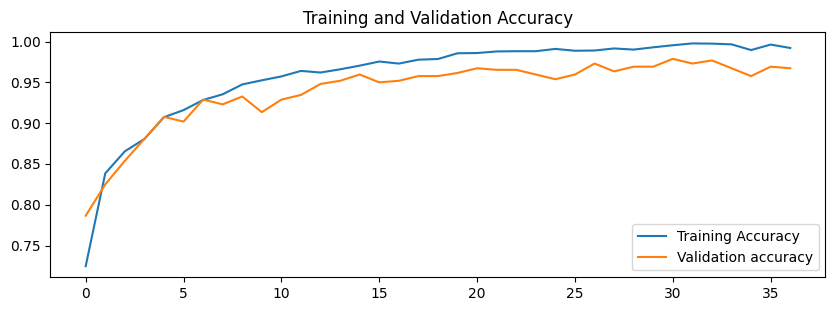

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation accuracy")

plt.legend()
plt.title("Training and Validation Accuracy");

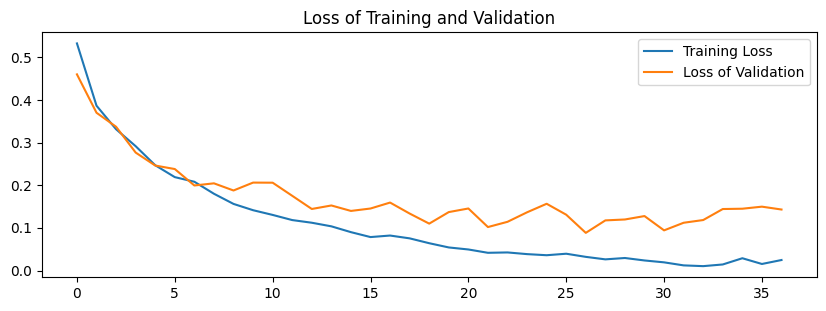

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Loss of Validation")

plt.legend()
plt.title("Loss of Training and Validation");

1/1 [==============================] - 0s 24ms/step
Does not content brain tumour and hence its Healthy 
[[0.28314728]]


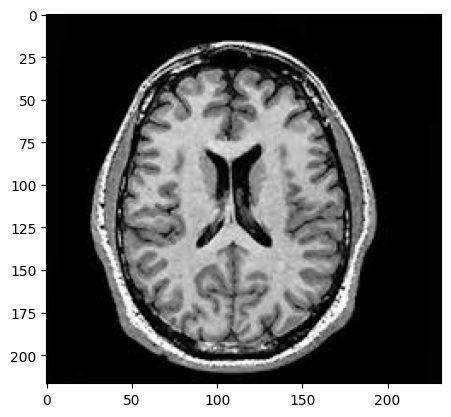

In [36]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Healthy/Not Cancer  (1079).jpg')
plt.imshow(img)
img = img/255.

img.resize((224,224,1))
img_expanded = tf.expand_dims(img, axis=0)

y_pred = model_0.predict(img_expanded)
if y_pred <=0.5:
  print("Does not content brain tumour and hence its Healthy ")
else:
  print("Does content Brain tumour and hence its Cancer")
print(y_pred)


1/1 [==============================] - 0s 35ms/step
Does content Brain tumour and hence its Cancer
[[0.9971514]]


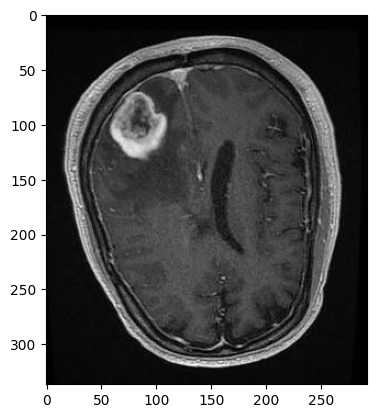

In [37]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Brain Tumor/Cancer (1037).jpg')
plt.imshow(img)
img = img/255.

img.resize((224,224,1))
img_expanded = tf.expand_dims(img, axis=0)

y_pred = model_0.predict(img_expanded)
if y_pred <=0.5:
  print("Does not content brain tumour and hence its Healthy ")
else:
  print("Does content Brain tumour and hence its Cancer")
print(y_pred)
